# Prédictions à partir de la première Base de Données

Dans un premier temps, nous allons tenter de prédire les résultats de Ligue 1 pour la saison en cours, à partir d'une base de donnée constituée de certaines données basiques sur l'ensemble des saisons depuis 2002-2003. Ces données seront, pour chaque match: la journée, le lieu du match, les deux équipes, le score, le classement des deux équipes. A partir de ces données nous allons pouvoir créer différents indicateurs comme la moyenne de buts marqués ou encore la forme des équipes et essayer de prédire les futures résultats. 

In [2]:
from fonctions import *

## Scrapping des données 

Nous commençons par scrapper nos données. Nous scrappons d'abord l'ensemble des résultats sur le site *fbref.com*. Nous créons à partir de ce scrapping un **DataFrame** avec 7 colonnes:

la saison, la journée, l'équipe domicile, l'équipe extérieur, le nombre de buts de l'équipe domicile, le nombre de buts de l'équipe extérieure et le résultat (1 = victoire domicile, 0 = match nul, -1 = victoire extérieur)

On enregistre le **DataFrame** au format csv.

In [ ]:
noms_colonnes = ['Saison','Journée','Domicile','Extérieur','Buts domicile','Buts extérieur','Résultat']     #on crée un dataframe vide qui contiendra tous les résultats de la Ligue 1 depuis 2002
dataframe_resultats = pd.DataFrame(columns=noms_colonnes)
for i in range (2002, 2023):                                                                                #on utilise la fonction précédente pour récupérer les résultats de chaque saison
    resultats_finaux, affiches = fonction_resultats(i)
    dataframe_resultats = dataframe_resultats._append(resultats_finaux, ignore_index=True)

dataframe_resultats.to_csv('dataframe_résultats.csv', encoding = 'utf-8', index=False)              #on sauvegarde le dataframe des résultats de ligue 1 de 2002-2003 à 2022-2023 dans un fichier csv


## Création du **DataFrame** final pour l'implémentation de modèles prédictifs

A partir de ce **DataFrame**, nous créons un nouveau **DataFrame** avec l'ensemble des informations que nous souhaitions avoir pour tenter de prédire les résultats futurs. Nous remplaçons 'Equipe à Domicile', 'Equipe à l'extérieur' par 'Equipe 1', 'Equipe 2', nous ajoutons une colonne valant si l'Equipe 1 est à domicile, 0 sinon, et nous créons un double de notre **DataFrame** en inversant Equipe 1 et Equipe 2, puis nous ajoutons les deux **DataFrame** de sorte à avoir, pour chaque équipe, l'ensemble de ses matchs en tant qu'Equipe 1. Ensuite nous ajoutons le classement à chaque journée des équipes de sorte à avoir pour chaque match le classement des deux équipes avant le match. Nous créons alors les colonnes suivantes : 'Moyenne buts marqués par 1', 'Moyennes buts marqués par 2', 'Moyenne buts marqués par 1 à domicile', 'Moyenne buts marqués par 1 à l'extérieur', 'Moyenne buts marqués par 2 à domicile', 'Moyenne buts marqués par 2 à l'extérieur', 'Moyenne buts encaissés par 1', 'Moyenne buts encaissés par 2','Moyenne buts encaissés par 1 à domicile', 'Moyenne buts encaissés par 1 à l'extérieur', 'Moyenne buts encaissés par 2 à domicile', 'Moyenne buts encaissés par 2 à l'extérieur', 'Forme Equipe 1', 'Forme Equipe 2' et  'Historique des confrontations'. La forme est un indicateur sur les 5 derniers matchs d'une équipe dans la saison, simplement en faisant la somme des résultats. 

*Avec notre fonction nous pouvons choisir d'avoir les indicateurs avant ou après le match. Le **DataFrame** avec les indicateurs avant le match nous sera utile pour les prédictions. Celui après le match est plus adapté aux statistiques descriptives puisqu'il n'y a pas la perte de donnée du dernier match de chaque saison.*

In [9]:
dataframe_resultats = pd.read_csv('dataframe_résultats.csv', encoding = 'utf-8')     #on récupère le dataframe des résultats de ligue 1 de 2002-2003 à 2022-2023
dataframe_stats = fonction_prepa_base(dataframe_resultats, 0)   #On applique la fonction précédente pour avoir notre dataframe qui nous servira pour les statistiques descriptives
dataframe_resultats = pd.read_csv('dataframe_résultats.csv', encoding = 'utf-8')     
dataframe_final = fonction_prepa_base(dataframe_resultats, 1)   #On applique la fonction précédente pour avoir notre dataframe qui nous servira pour les modèles 

dataframe_final.to_csv('dataframe_final.csv', encoding = 'utf-8', index=False)  #On sauvegarde le dataframe dans un fichier csv


## Statistiques descriptives 

Dans cette première approche nous avons beaucoup d'observations mais assez peu de variables en comparaison avec notre deuxième approche. Nous pouvons tout de même visualiser quelques statistiques descriptives. 

*On peut d'abord regarder à quoi ressemble nos deux **DataFrames** avec la première saison de celui pour les statistiques descriptives et les 10 premières lignes pour l'autre*

In [10]:
dataframe_stats.head(38)

,Saison,Journée,Equipe 1,Equipe 2,Lieu,Buts Equipe 1,Buts Equipe 2,Résultat,Classement Equipe 1,Classement Equipe 2,...,Moyenne_BM par 2 à Extérieur,Moyenne_BE par 1,Moyenne_BE par 2,Moyenne_BE par 1 à Domicile,Moyenne_BE par 2 à Domicile,Moyenne_BE par 1 à Extérieur,Moyenne_BE par 2 à Extérieur,Forme 1,Forme 2,Historique
0,2002-2003,1,Ajaccio,Strasbourg,Extérieur,1,1,Nul,9,12,...,NaN,1.000000,1.000000,NaN,1.000000,1.000000,NaN,0.0,0.0,0
1,2002-2003,2,Ajaccio,Guingamp,Domicile,0,2,Défaite,16,4,...,2.000000,1.500000,1.500000,2.000000,3.000000,1.000000,0.000000,-1.0,1.0,-1
2,2002-2003,3,Ajaccio,Paris Saint Germain,Extérieur,2,2,Nul,15,10,...,0.000000,1.666667,0.666667,2.000000,1.000000,1.500000,0.000000,-1.0,1.0,0
3,2002-2003,4,Ajaccio,Sedan,Domicile,1,0,Victoire,13,20,...,0.500000,1.250000,2.000000,1.000000,0.500000,1.500000,3.500000,0.0,-3.0,1
4,2002-2003,5,Ajaccio,Troyes,Extérieur,0,1,Défaite,15,16,...,0.000000,1.200000,1.200000,1.000000,2.000000,1.333333,0.000000,-1.0,-1.0,-1
5,2002-2003,6,Ajaccio,Montpellier,Domicile,0,0,Nul,15,17,...,0.333333,1.000000,0.833333,0.666667,0.333333,1.333333,1.333333,-1.0,-3.0,0
6,2002-2003,7,Ajaccio,Bastia,Extérieur,2,1,Victoire,12,15,...,0.333333,1.000000,1.428571,0.666667,1.000000,1.250000,2.000000,1.0,-1.0,1
7,2002-2003,8,Ajaccio,Sochaux,Domicile,0,1,Défaite,13,7,...,0.800000,1.000000,1.000000,0.750000,1.333333,1.250000,0.800000,0.0,1.0,-1
8,2002-2003,9,Ajaccio,Marseille,Extérieur,1,3,Défaite,17,3,...,1.750000,1.222222,1.000000,0.750000,1.000000,1.600000,1.000000,-2.0,2.0,-1
9,2002-2003,10,Ajaccio,Nantes,Domicile,1,0,Victoire,13,16,...,0.833333,1.100000,1.500000,0.600000,1.500000,1.600000,1.500000,0.0,-3.0,1


In [11]:
dataframe_final.head(10)

,Saison,Journée,Equipe 1,Equipe 2,Equipe 1 à Domicile,Buts Equipe 1,Buts Equipe 2,Résultat,Classement Equipe 1,Classement Equipe 2,...,Moyenne_BM par 2 à Extérieur,Moyenne_BE par 1,Moyenne_BE par 2,Moyenne_BE par 1 à Domicile,Moyenne_BE par 2 à Domicile,Moyenne_BE par 1 à Extérieur,Moyenne_BE par 2 à Extérieur,Forme 1,Forme 2,Historique
0,2002-2003,1,Ajaccio,Strasbourg,0,1,1,0,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2002-2003,2,Ajaccio,Guingamp,1,0,2,-1,9,7,...,NaN,1.000000,3.000000,NaN,3.000000,1.000000,NaN,0.0,0.0,0
2,2002-2003,3,Ajaccio,Paris Saint Germain,0,2,2,0,16,6,...,0.000000,1.500000,0.000000,2.000000,0.000000,1.000000,0.0,-1.0,1.0,0
3,2002-2003,4,Ajaccio,Sedan,1,1,0,1,15,19,...,1.000000,1.666667,2.333333,2.000000,0.500000,1.500000,6.0,-1.0,-2.0,0
4,2002-2003,5,Ajaccio,Troyes,0,0,1,-1,13,17,...,0.000000,1.250000,1.500000,1.000000,3.000000,1.500000,0.0,0.0,-2.0,0
5,2002-2003,6,Ajaccio,Montpellier,1,0,0,0,15,17,...,0.500000,1.200000,1.000000,1.000000,0.333333,1.333333,2.0,-1.0,-2.0,0
6,2002-2003,7,Ajaccio,Bastia,0,2,1,1,15,12,...,0.333333,1.000000,1.333333,0.666667,0.666667,1.333333,2.0,-1.0,-1.0,0
7,2002-2003,8,Ajaccio,Sochaux,1,0,1,-1,12,10,...,0.750000,1.000000,1.142857,0.666667,1.333333,1.250000,1.0,1.0,1.0,0
8,2002-2003,9,Ajaccio,Marseille,0,1,3,-1,13,4,...,1.750000,1.000000,1.000000,0.750000,1.000000,1.250000,1.0,0.0,2.0,0
9,2002-2003,10,Ajaccio,Nantes,1,1,0,1,17,13,...,1.000000,1.222222,1.555556,0.750000,1.500000,1.600000,1.6,-2.0,-3.0,0


*Affichons ensuites les occurences du nombre de buts marqués par match par une équipe sur toutes les saisons*

In [12]:
display(dataframe_stats.groupby(['Saison'])['Buts Equipe 1'].value_counts().unstack().fillna(0).astype(int))

Buts Equipe 1,0,1,2,3,4,5,6,7,8,9
Saison,,,,,,,,,,
2002-2003,277,251,147,56,24,2,3,0,0,0
2003-2004,250,269,147,62,26,5,1,0,0,0
2004-2005,268,265,152,54,13,7,0,0,1,0
2005-2006,278,273,129,51,25,0,2,1,1,0
2006-2007,250,272,150,71,15,2,0,0,0,0
2007-2008,262,258,141,77,15,5,2,0,0,0
2008-2009,240,273,172,59,16,0,0,0,0,0
2009-2010,241,274,139,68,30,8,0,0,0,0
2010-2011,233,272,177,55,17,5,1,0,0,0


*Puis par équipe*

In [13]:
display(dataframe_stats.groupby(['Equipe 1'])['Buts Equipe 1'].value_counts().unstack().fillna(0).astype(int))

Buts Equipe 1,0,1,2,3,4,5,6,7,8,9
Equipe 1,,,,,,,,,,
Ajaccio,126,113,49,11,5,0,0,0,0,0
Amiens,41,37,18,6,2,0,0,0,0,0
Angers,102,106,59,23,2,2,0,0,0,0
Arles-Avignon,23,11,2,2,0,0,0,0,0,0
Auxerre,135,149,95,24,13,2,0,0,0,0
Bastia,119,104,56,17,8,0,0,0,0,0
Bordeaux,212,270,159,75,27,4,3,0,0,0
Boulogne,19,10,6,3,0,0,0,0,0,0
Brest,82,99,58,10,4,3,0,0,0,0


*Affichons le nombre de journées occupé à chaque place par chaque équipe*

In [14]:
display(dataframe_stats.groupby(['Equipe 1'])['Classement Equipe 1'].value_counts().unstack().fillna(0).astype(int))

Classement Equipe 1,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Equipe 1,,,,,,,,,,,,,,,,,,,,
Ajaccio,0,1,0,2,0,1,4,2,5,7,3,4,20,11,30,29,42,53,45,45
Amiens,0,0,0,0,0,0,0,0,3,1,2,2,16,7,8,20,23,13,8,1
Angers,3,12,11,9,9,6,7,16,23,20,16,39,18,31,12,8,8,7,12,27
Arles-Avignon,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,36
Auxerre,8,19,18,39,34,23,20,12,13,20,14,21,22,27,26,25,29,18,16,14
Bastia,1,3,3,1,5,4,5,7,12,17,25,33,40,34,30,21,12,15,27,9
Bordeaux,27,69,39,43,43,64,71,54,64,47,39,40,38,29,17,18,12,10,13,13
Boulogne,0,0,0,0,0,0,1,2,0,0,1,1,0,1,0,2,1,1,27,1
Brest,2,1,1,1,2,4,4,4,6,9,23,30,31,32,31,23,16,17,10,9


*Affichons les résultats de chaque équipe*

In [15]:
display(dataframe_stats.groupby('Equipe 1')['Résultat'].value_counts().unstack().fillna(0).astype(int))

Résultat,Défaite,Nul,Victoire
Equipe 1,,,
Ajaccio,147,91,66
Amiens,48,31,25
Angers,133,79,82
Arles-Avignon,24,11,3
Auxerre,144,120,154
Bastia,133,80,91
Bordeaux,226,234,290
Boulogne,21,10,7
Brest,113,73,70


*Affichons les résultats en fonction du classement avant le match*

In [16]:
resultats_counts =  dataframe_final.groupby('Classement Equipe 1')['Résultat'].value_counts().unstack().fillna(0).astype(int)
resultats_counts.columns = ['Défaite', 'Nul', 'Victoire']
display(resultats_counts)

,Défaite,Nul,Victoire
Classement Equipe 1,,,
1,144,182,440
2,199,205,363
3,216,198,353
4,221,230,316
5,251,224,292
6,231,218,318
7,265,228,274
8,270,226,271
9,264,231,272


*Affichons les résultats en fonction de Domicile/Extérieur*

In [17]:
display(dataframe_stats.groupby('Lieu')['Résultat'].value_counts().unstack().fillna(0).astype(int))

Résultat,Défaite,Nul,Victoire
Lieu,,,
Domicile,2123,2208,3548
Extérieur,3548,2208,2123


*Affichons le nombre de buts marqué en fonction de Domicile/Extérieur*

In [18]:
display(dataframe_stats.groupby('Lieu')['Buts Equipe 1'].value_counts().unstack().fillna(0).astype(int))

Buts Equipe 1,0,1,2,3,4,5,6,7,8,9
Lieu,,,,,,,,,,
Domicile,1943,2729,1856,873,341,97,33,3,3,1
Extérieur,2883,2805,1439,535,165,39,8,4,0,1


*Affichons les résultats en fonction de la forme des équipes avant le match.*

*La valeur de forme est égale à (nombre de victoires - nombre de défaites) sur les 5 derniers matchs*

In [19]:
resultats_counts =  dataframe_final.groupby('Forme 1')['Résultat'].value_counts().unstack().fillna(0).astype(int)
resultats_counts.columns = ['Défaite', 'Nul', 'Victoire']
display(resultats_counts)

,Défaite,Nul,Victoire
Forme 1,,,
-5.0,84,40,23
-4.0,178,121,138
-3.0,488,302,338
-2.0,751,547,617
-1.0,1032,780,878
0.0,1028,787,1019
1.0,895,728,989
2.0,590,527,680
3.0,326,297,488


*Affichons un tableau à double entrée des historiques entre les équipes.*

*La valeur affichée représente (nombre de victoires - nombre de défaites) de l'Equipe 1 contre l'Equipe 2*

In [20]:
display(pd.pivot_table(dataframe_stats, values='Historique', index='Equipe 1', columns='Equipe 2', aggfunc='last').fillna(0).astype(int))

Equipe 2,Ajaccio,Amiens,Angers,Arles-Avignon,Auxerre,Bastia,Bordeaux,Boulogne,Brest,Caen,...,Paris Saint Germain,Reims,Rennes,Saint-Étienne,Sedan,Sochaux,Strasbourg,Toulouse,Troyes,Valenciennes
Equipe 1,,,,,,,,,,,,,,,,,,,,,
Ajaccio,0,0,2,0,-3,0,-5,0,2,0,...,-5,-1,-5,-4,1,-2,-2,-1,-3,1
Amiens,0,0,-2,0,0,0,-1,0,0,0,...,-4,1,-3,-2,0,0,0,-1,-1,0
Angers,-2,2,0,0,0,2,2,0,0,6,...,-14,-2,-8,-6,0,0,-1,-4,3,0
Arles-Avignon,0,0,0,0,-1,0,-1,0,0,0,...,-2,0,-2,-2,0,-2,0,0,0,-2
Auxerre,3,0,0,1,0,1,-3,0,-2,1,...,-5,-1,3,0,2,7,2,3,5,1
Bastia,0,0,-2,0,-1,0,0,0,0,2,...,-10,2,5,-8,-1,-1,-2,5,1,0
Bordeaux,5,1,-2,1,3,0,0,1,0,0,...,-9,-5,5,6,2,6,-4,2,6,5
Boulogne,0,0,0,0,0,0,-1,0,0,0,...,-2,0,0,0,0,1,0,-1,0,-1
Brest,-2,0,0,0,2,0,0,0,0,0,...,-12,-1,-7,0,0,-1,-1,-2,2,1


## Quelques graphiques

*Regardons pour commencer l'évolution du nombre de buts par saison*

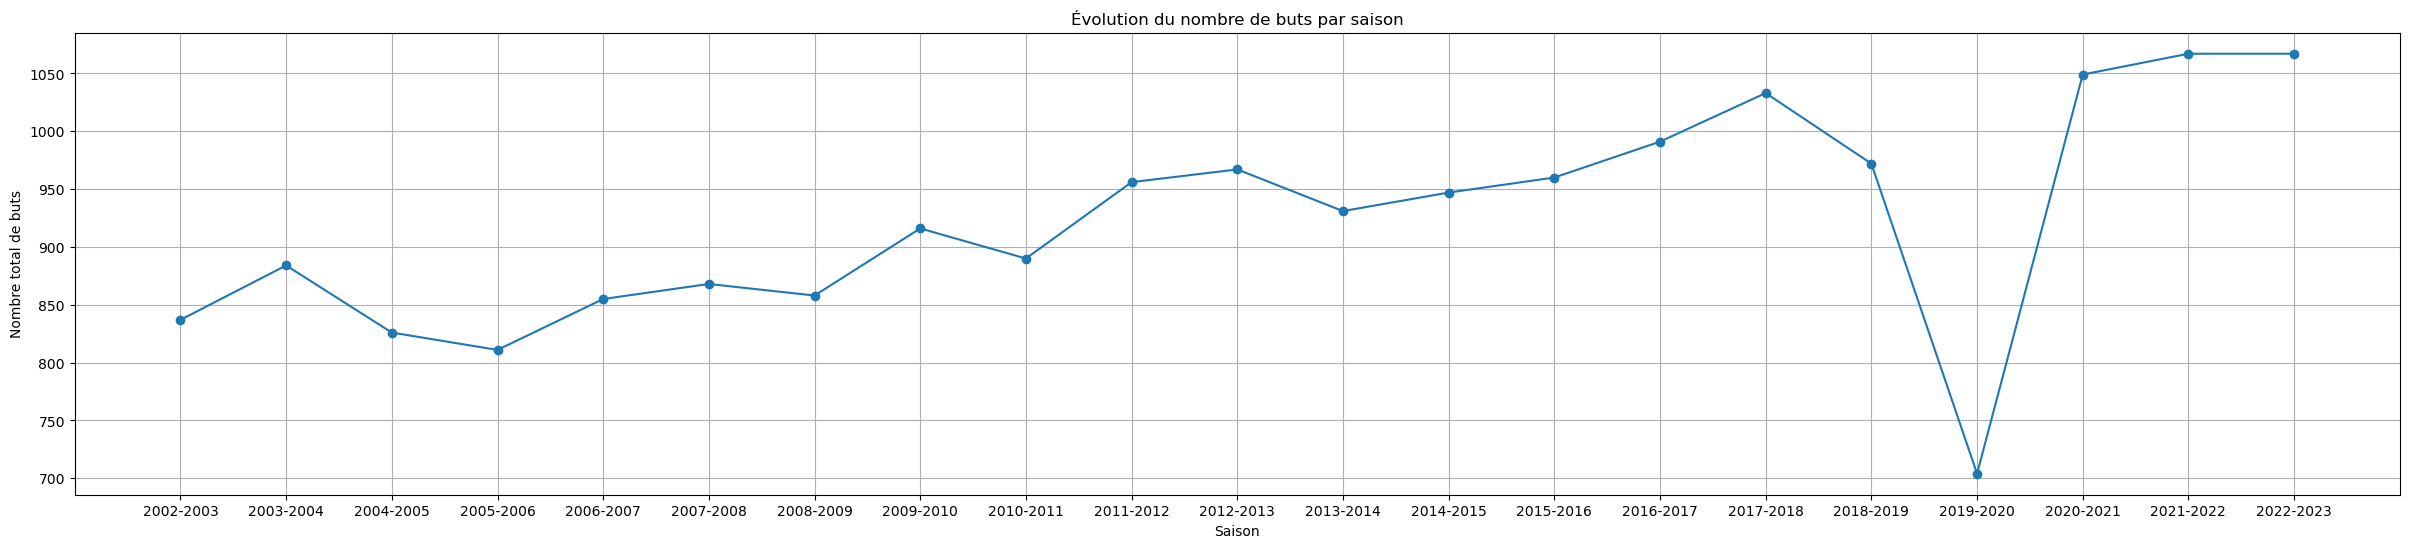

In [21]:
buts_par_saison = dataframe_stats.groupby('Saison')['Buts Equipe 1'].sum().reset_index()

plt.figure(figsize=(30, 6))
plt.plot(buts_par_saison['Saison'], buts_par_saison['Buts Equipe 1'], marker='o', linestyle='-')
plt.title('Évolution du nombre de buts par saison')
plt.xlabel('Saison')
plt.ylabel('Nombre total de buts')
plt.grid(True)
plt.show()

*On peut ensuite discriminer en fonction de Domicile/Extérieur et regarder les moyennes au lieu du total*

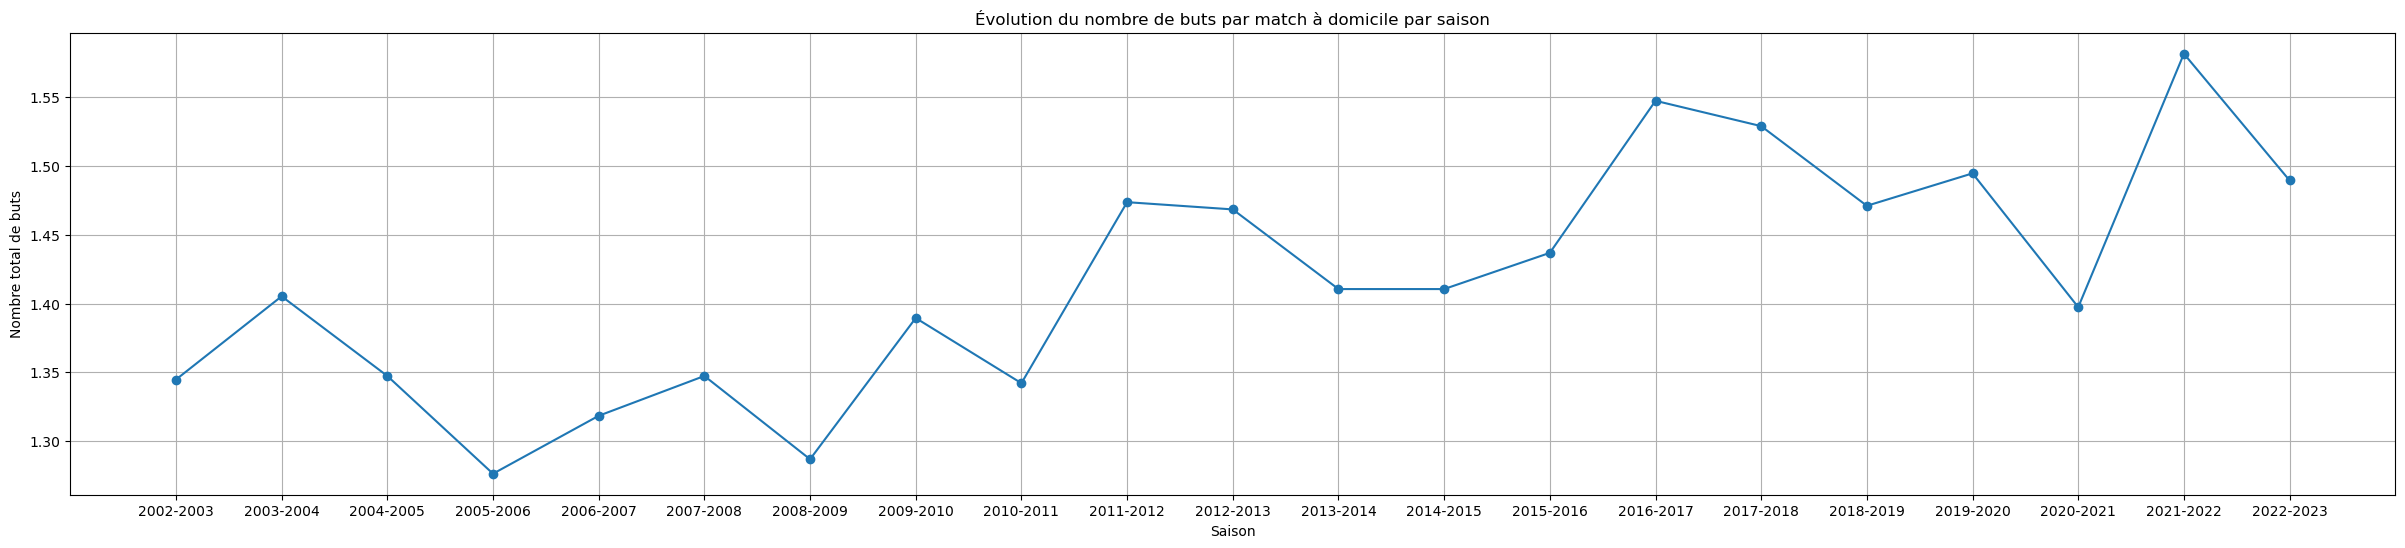

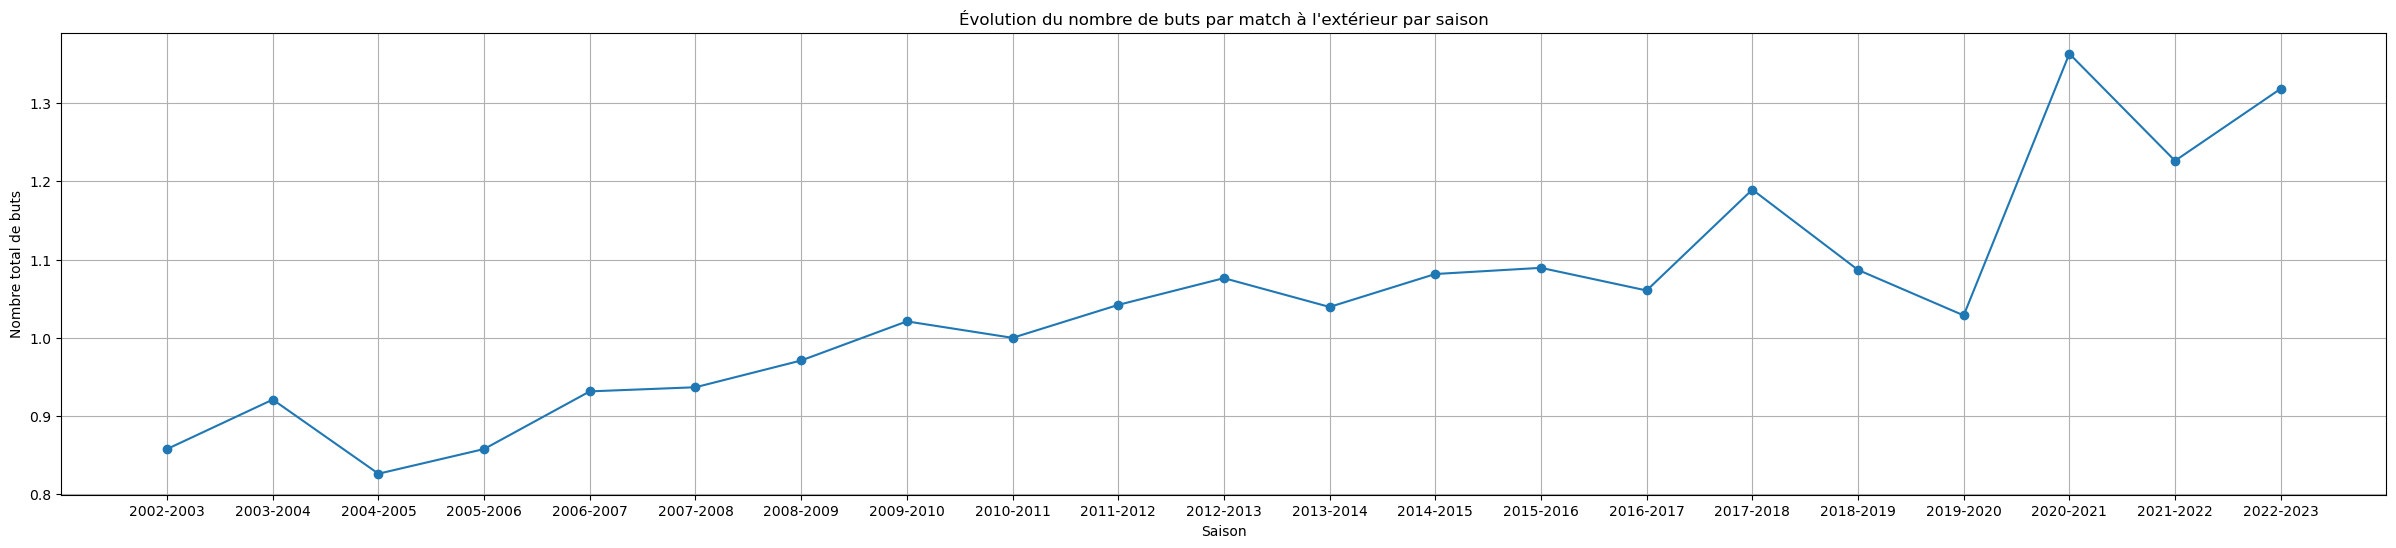

In [22]:
buts_par_saison = dataframe_stats[dataframe_stats['Lieu']=='Domicile'].groupby('Saison')['Buts Equipe 1'].mean().reset_index()

plt.figure(figsize=(30, 6))
plt.plot(buts_par_saison['Saison'], buts_par_saison['Buts Equipe 1'], marker='o', linestyle='-')
plt.title('Évolution du nombre de buts par match à domicile par saison')
plt.xlabel('Saison')
plt.ylabel('Nombre total de buts')
plt.grid(True)
plt.show()

buts_par_saison = dataframe_stats[dataframe_stats['Lieu']=='Extérieur'].groupby('Saison')['Buts Equipe 1'].mean().reset_index()

plt.figure(figsize=(30, 6))
plt.plot(buts_par_saison['Saison'], buts_par_saison['Buts Equipe 1'], marker='o', linestyle='-')
plt.title('Évolution du nombre de buts par match à l\'extérieur par saison')
plt.xlabel('Saison')
plt.ylabel('Nombre total de buts')
plt.grid(True)
plt.show()

*Regardons ensuite le nombre de buts par équipe sur la période*

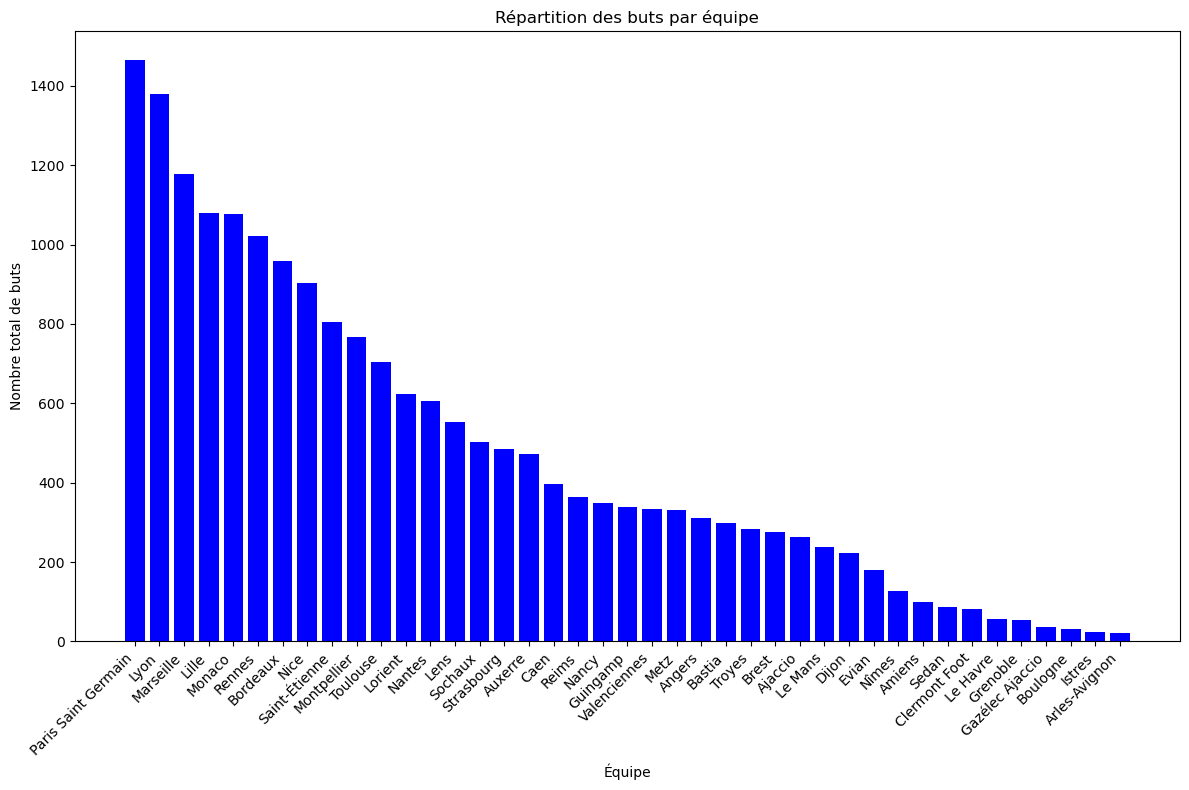

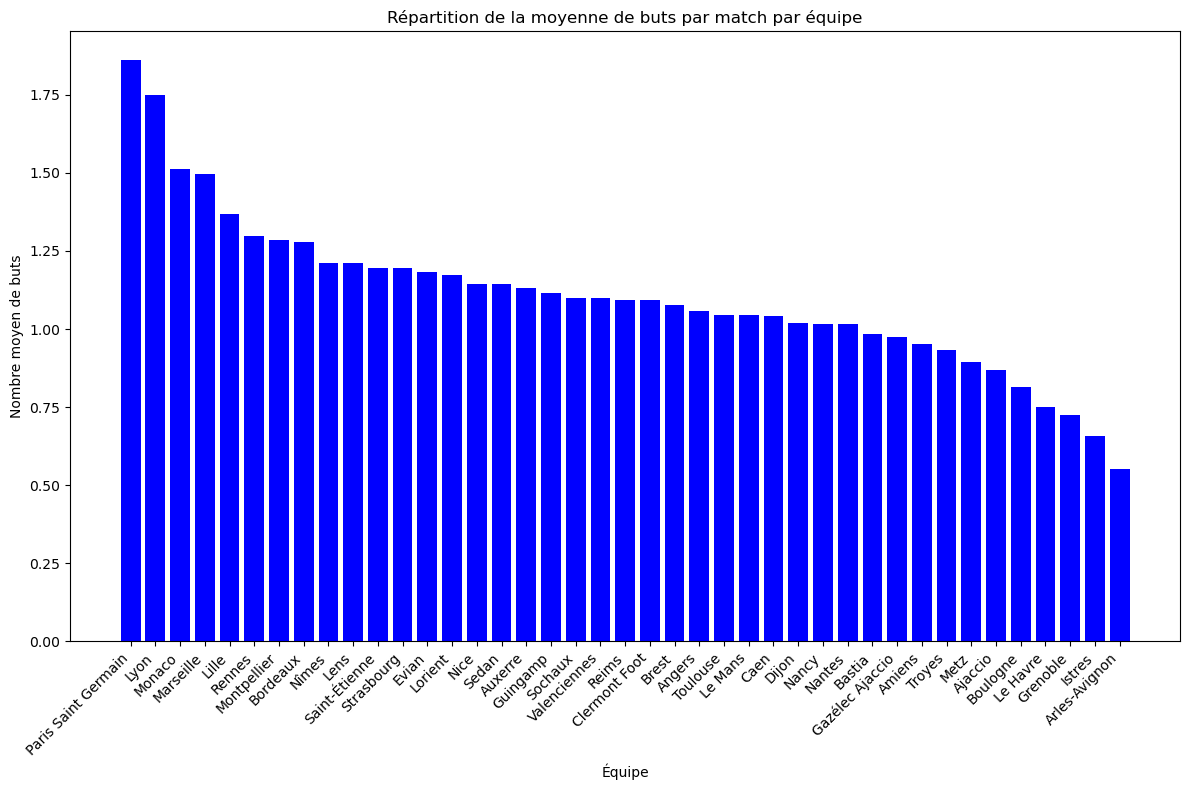

In [23]:
buts_par_equipe = dataframe_stats.groupby('Equipe 1')['Buts Equipe 1'].sum().reset_index()

buts_par_equipe = buts_par_equipe.sort_values(by='Buts Equipe 1', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(buts_par_equipe['Equipe 1'], buts_par_equipe['Buts Equipe 1'], color='blue')
plt.title('Répartition des buts par équipe')
plt.xlabel('Équipe')
plt.ylabel('Nombre total de buts')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

buts_par_equipe = dataframe_stats.groupby('Equipe 1')['Buts Equipe 1'].mean().reset_index()

buts_par_equipe = buts_par_equipe.sort_values(by='Buts Equipe 1', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(buts_par_equipe['Equipe 1'], buts_par_equipe['Buts Equipe 1'], color='blue')
plt.title('Répartition de la moyenne de buts par match par équipe')
plt.xlabel('Équipe')
plt.ylabel('Nombre moyen de buts')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

*On peut aussi regarder le nombre de points sur la période (Victoire = 3, Nul = 1, Défaite = 0)*

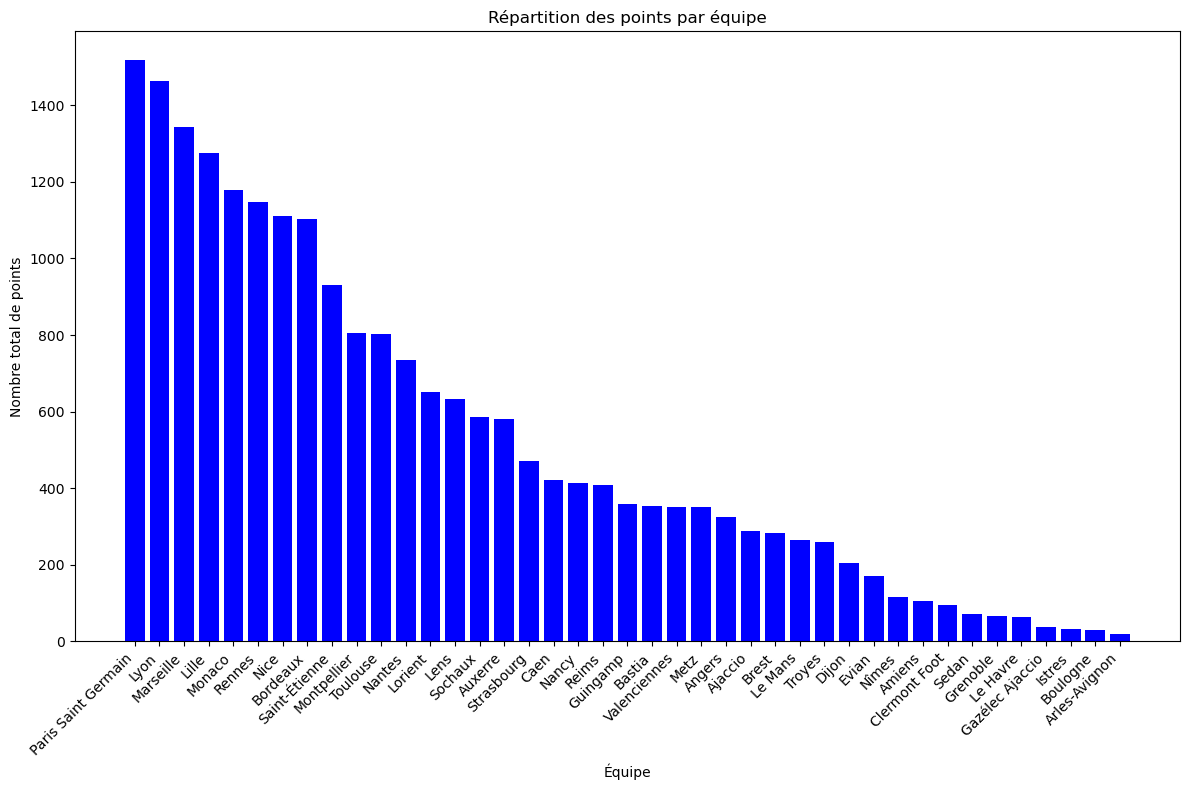

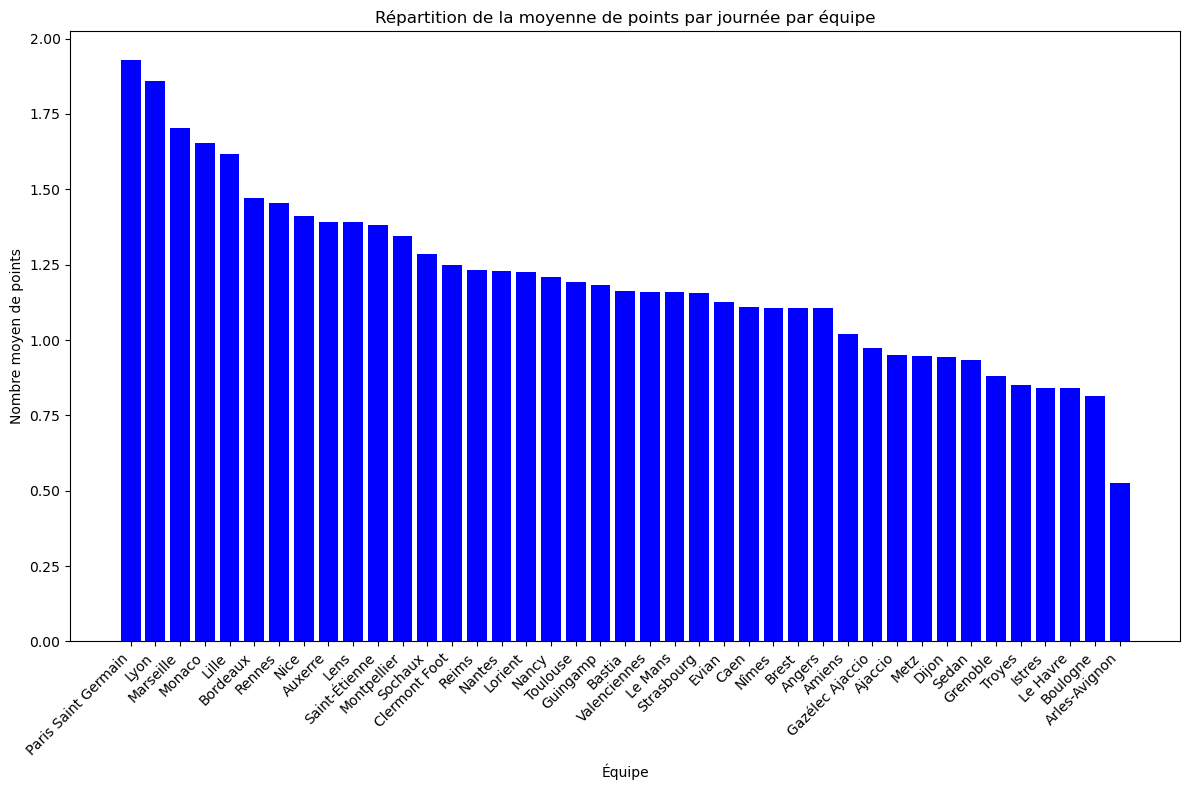

In [24]:
df_plot = dataframe_stats.copy()
df_plot['Résultat'] = df_plot['Résultat'].replace({'Défaite': 0, 'Nul': 1, 'Victoire': 3})

buts_par_equipe = df_plot.groupby('Equipe 1')['Résultat'].sum().reset_index()

buts_par_equipe = buts_par_equipe.sort_values(by='Résultat', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(buts_par_equipe['Equipe 1'], buts_par_equipe['Résultat'], color='blue')
plt.title('Répartition des points par équipe')
plt.xlabel('Équipe')
plt.ylabel('Nombre total de points')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

df_plot = dataframe_stats.copy()
df_plot['Résultat'] = df_plot['Résultat'].replace({'Défaite': 0, 'Nul': 1, 'Victoire': 3})

buts_par_equipe = df_plot.groupby('Equipe 1')['Résultat'].mean().reset_index()

buts_par_equipe = buts_par_equipe.sort_values(by='Résultat', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(buts_par_equipe['Equipe 1'], buts_par_equipe['Résultat'], color='blue')
plt.title('Répartition de la moyenne de points par journée par équipe')
plt.xlabel('Équipe')
plt.ylabel('Nombre moyen de points')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

*Regardons le pourcentage de Victoire à Domicile. Pour l'extérieur il suffit d'inverser Victoire et Défaite*

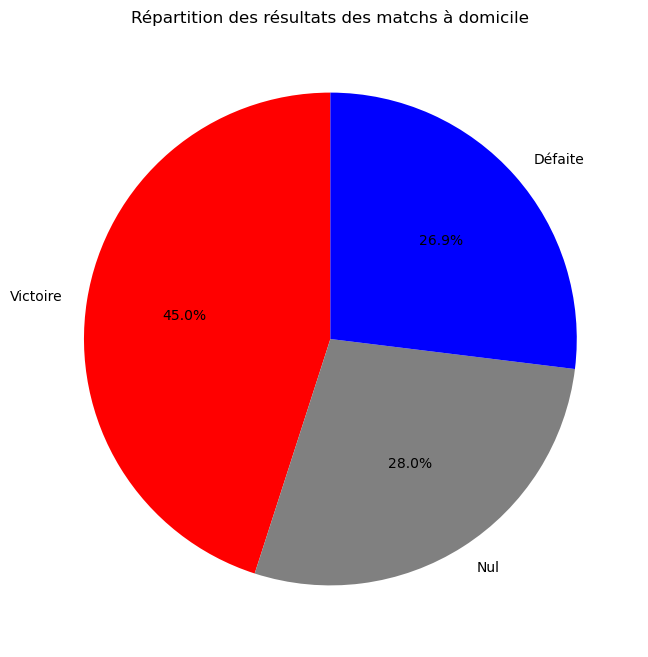

In [25]:
df_plot = dataframe_stats.copy()

result_counts = df_plot[df_plot['Lieu']=='Domicile']['Résultat'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', startangle=90, colors=['red', 'gray', 'blue'])
plt.title('Répartition des résultats des matchs à domicile')
plt.show()

*On peut aussi regarder le pourcentage de Victoire contre des équipes moins bien classées*

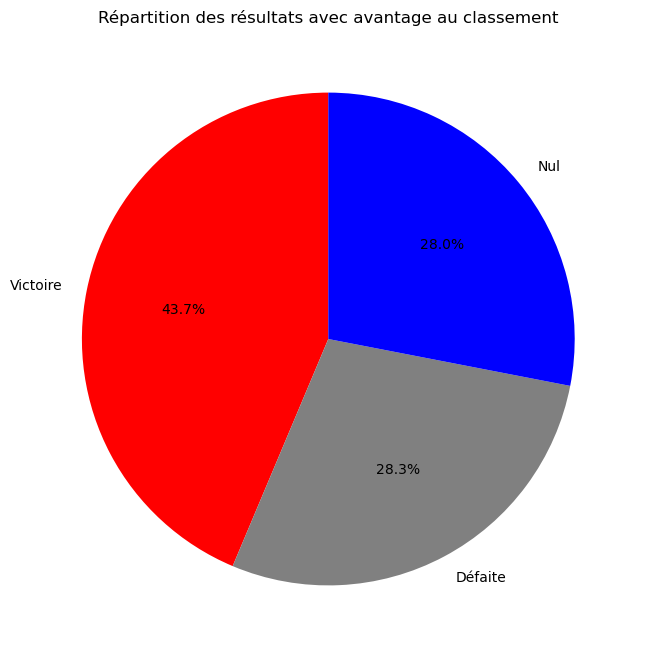

In [26]:
df_plot = dataframe_final.copy()
df_plot['Résultat'] = df_plot['Résultat'].replace({-1: 'Défaite', 0: 'Nul', 1: 'Victoire'})
result_counts = df_plot[df_plot['Classement Equipe 1']<=df_plot['Classement Equipe 2']]['Résultat'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', startangle=90, colors=['red', 'gray', 'blue'])
plt.title('Répartition des résultats avec avantage au classement')
plt.show()

*Analysons maintenant les occurences des scores avec deux méthodes différentes*

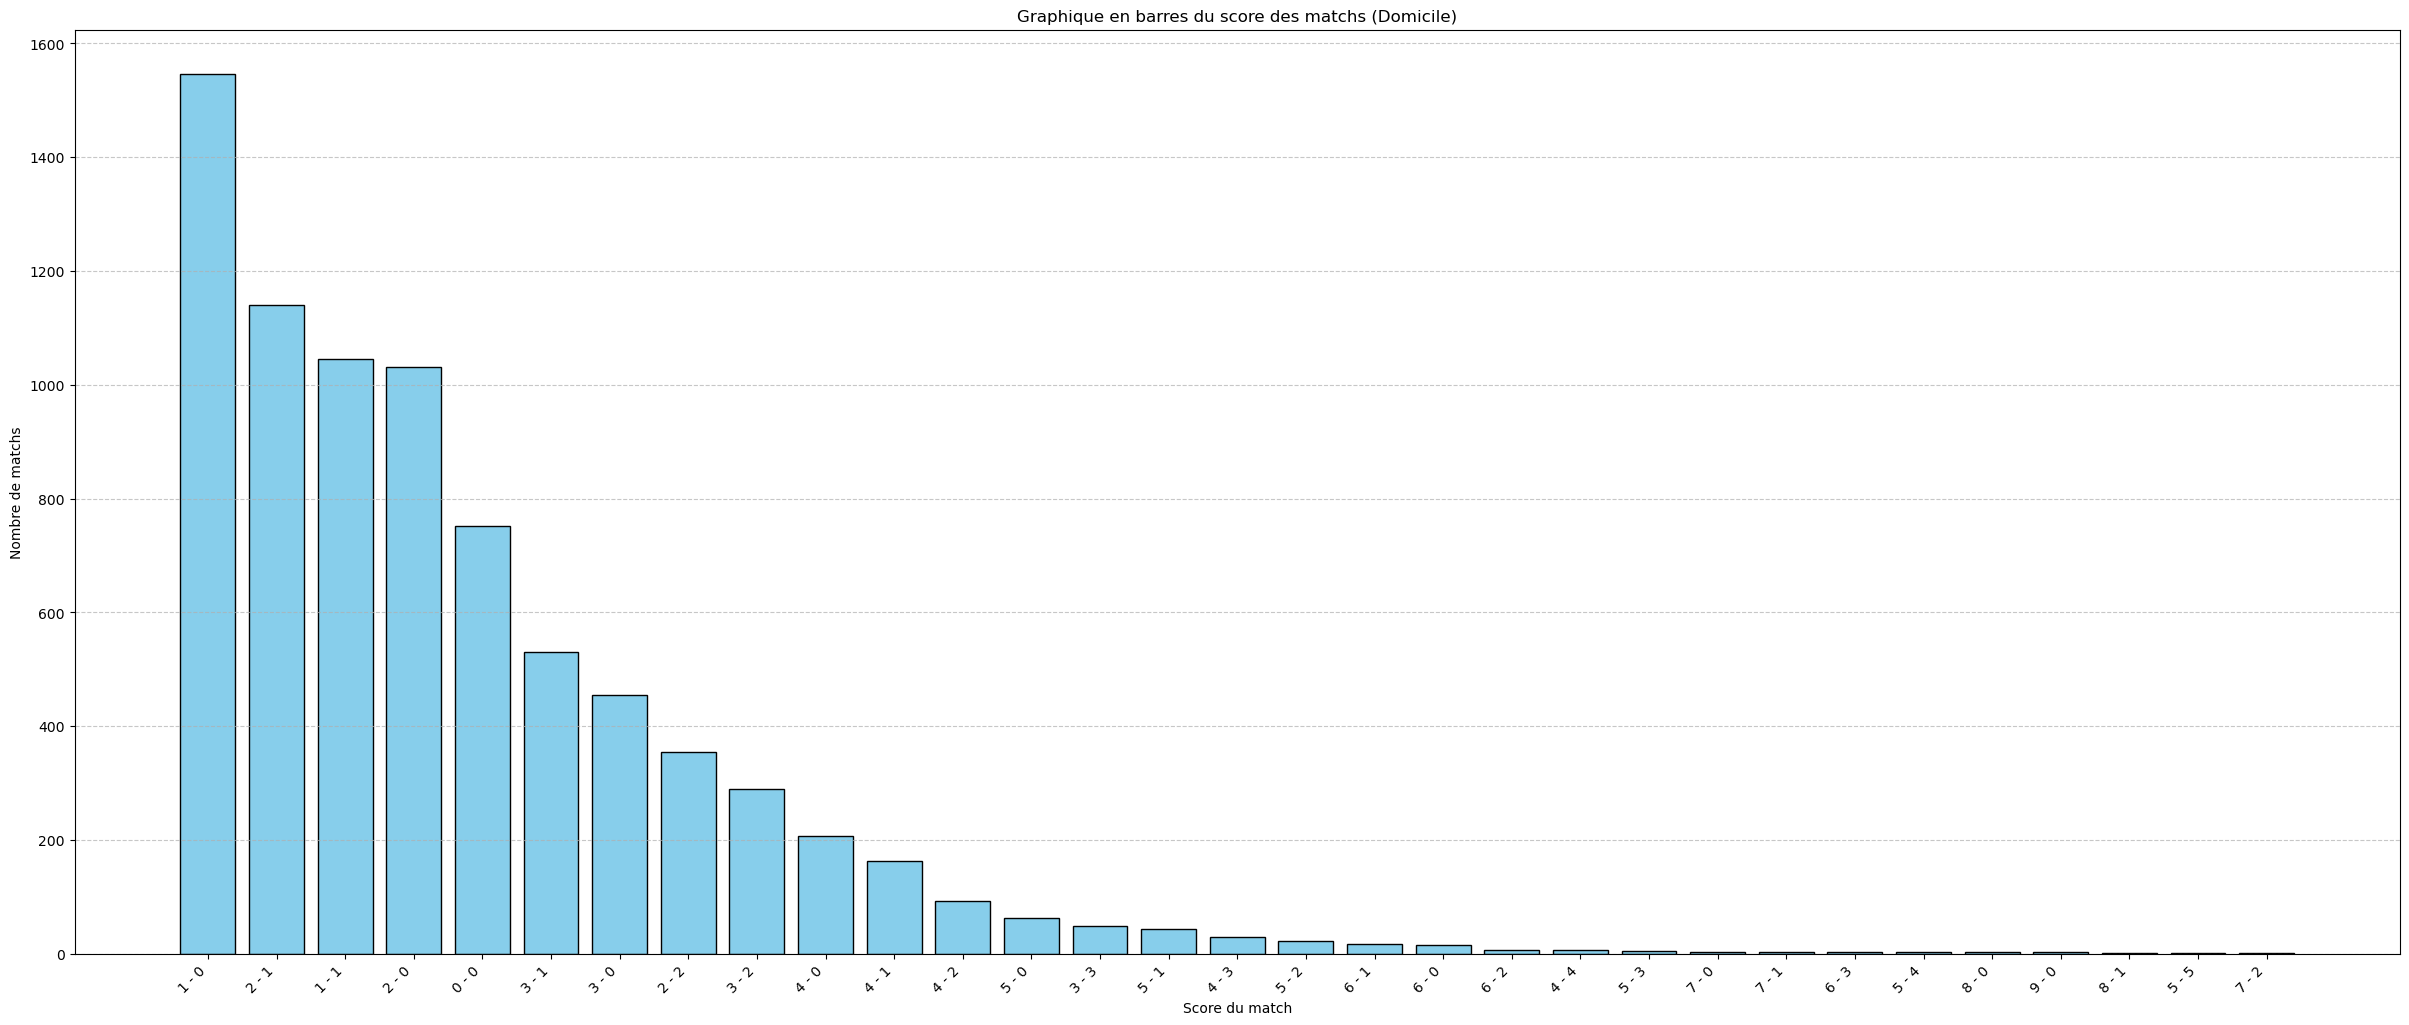

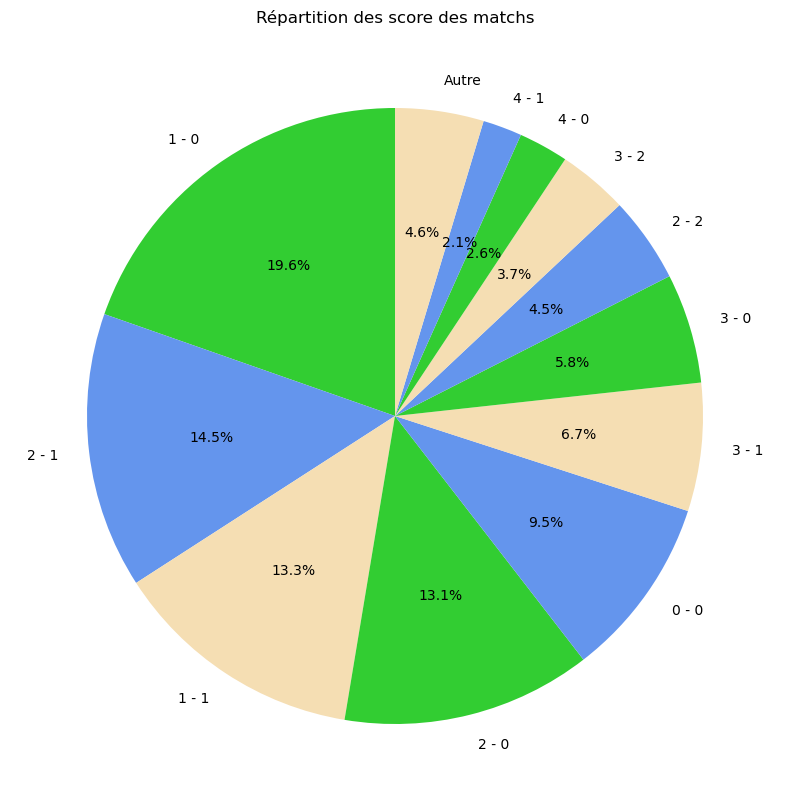

In [27]:
df_plot = dataframe_stats.copy()
df_plot['Score'] = df_plot.apply(lambda row: max(row['Buts Equipe 1'], row['Buts Equipe 2']), axis=1).astype(str) + ' - ' + df_plot.apply(lambda row: min(row['Buts Equipe 1'], row['Buts Equipe 2']), axis=1).astype(str) 
scores_categories = pd.Categorical(df_plot['Score'], categories=df_plot['Score'].unique(), ordered=True)

score_counts = df_plot[df_plot['Lieu'] == 'Domicile']['Score'].value_counts()

plt.figure(figsize=(30, 12))
plt.bar(range(len(score_counts)), score_counts, color='skyblue', edgecolor='black')
plt.title('Graphique en barres du score des matchs (Domicile)')
plt.xticks(range(len(score_counts)), score_counts.index, rotation=45, ha='right')
plt.xlabel('Score du match')
plt.ylabel('Nombre de matchs')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

result_counts = df_plot[df_plot['Lieu']=='Domicile']['Score'].value_counts()
result_counts_grouped = result_counts.copy()
result_counts_grouped['Autre'] = result_counts[result_counts < 150].sum() 
result_counts_grouped = result_counts_grouped[result_counts_grouped >= 150]

plt.figure(figsize=(10, 10))
plt.pie(result_counts_grouped, labels=result_counts_grouped.index, autopct='%1.1f%%', startangle=90, colors=['limegreen', 'cornflowerblue', 'wheat'])
plt.title('Répartition des score des matchs')
plt.show()

*On peut enfin faire un graph en barres du nombre de buts totals par match*

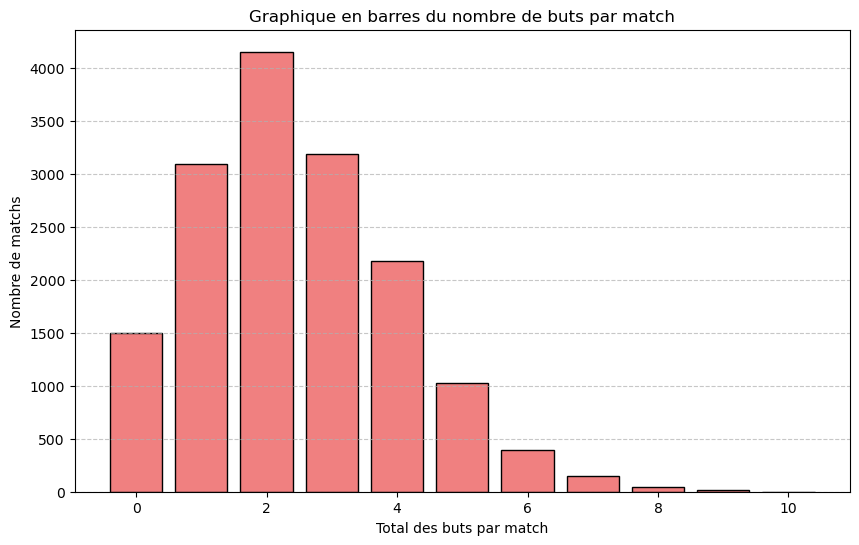

In [28]:
df_plot['Total Buts'] = df_plot['Buts Equipe 1'] + df_plot['Buts Equipe 2']

total_buts_counts = df_plot['Total Buts'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(total_buts_counts.index, total_buts_counts, color='lightcoral', edgecolor='black')

plt.title('Graphique en barres du nombre de buts par match')
plt.xlabel('Total des buts par match')
plt.ylabel('Nombre de matchs')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Modélisation

Passons maintenant à la phase modélisation. Nous allons ici tester 3 modèles en modifiant les variables explicatives et même la variable expliquée. Ces modèles sont : **modèle de régression linéaire**, **Random Forest** et **modèle SVM**

Dans un premier temps, applicons ses 3 modèles avec comme variables expliquées le **Résultat** et le **Nombre de buts** de chaque équipe, et le reste des données numériques comme variables explicatives. On transforme le classement en 1/classement pour faciliter la régression et on accorde plus d'importances aux observations au fur et à mesure de la saiosn puisque les variables explicatives sont moins révélatrices en début de saison *(un classement à la 3ème journée est beaucoup moins révélateur qu'à la 37ème)*. 

In [4]:
dataframe_regression = pd.read_csv('dataframe_final.csv', encoding = 'utf-8').dropna()   
dataframe_regression['Classement Equipe 1'] = 1/dataframe_regression['Classement Equipe 1']
dataframe_regression['Classement Equipe 2'] = 1/dataframe_regression['Classement Equipe 2']
X = dataframe_regression.drop(['Equipe 1', 'Equipe 2', 'Saison', 'Journée', 'Buts Equipe 1', 'Buts Equipe 2', 'Résultat'], axis=1)


Y_test, Y_pred, Y_pred2, Y_pred3, Y_pred4 = fonction_appli_modeles(dataframe_regression, X)





                            WLS Regression Results                            
Dep. Variable:               Résultat   R-squared:                       0.125
Model:                            WLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     94.35
Date:                Wed, 27 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:23:08   Log-Likelihood:                -14563.
No. Observations:               11915   AIC:                         2.916e+04
Df Residuals:                   11896   BIC:                         2.931e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

c:\Users\vtgra\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest sur le Résultat
Accuracy: 0.4716
Classification Report:
               precision    recall  f1-score   support

          -1       0.48      0.64      0.55      1083
           0       0.25      0.08      0.12       815
           1       0.51      0.60      0.55      1081

    accuracy                           0.47      2979
   macro avg       0.41      0.44      0.41      2979
weighted avg       0.43      0.47      0.43      2979



c:\Users\vtgra\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM model sur le Résultat
Accuracy: 0.4861
Classification Report:
               precision    recall  f1-score   support

          -1       0.48      0.69      0.57      1083
           0       0.23      0.01      0.01       815
           1       0.49      0.65      0.56      1081

    accuracy                           0.49      2979
   macro avg       0.40      0.45      0.38      2979
weighted avg       0.42      0.49      0.41      2979



*Nos résultats sont situés entre 47 et 50,1% de bons pronostiques. Ces résultats sont corrects au vu de l'imprévisibilité d'un domaine comme le football mais on aurait pu s'attendre à avoir un meilleur résultat. On peut donc essayer de faire mieux*

On peut faire une tentative de pondération des modèles pour en sortir une prédiction plus précise. On teste donc différents poids associés aux modèles.

In [30]:
n=0
for poids_modele1 in np.arange(0, 2, 0.2):
    for poids_modele2 in np.arange(0, 2, 0.2):
        for poids_modele3 in np.arange(0, 2, 0.2):
            for poids_modele4 in np.arange(0, 2, 0.2):  
                for k in np.arange(0,2,0.2):
                    Y_pred = np.array(Y_pred)
                    Y_pred2 = np.array(Y_pred2)
                    Y_pred3 = np.array(Y_pred3)
                    Y_pred4 = np.array(Y_pred4)

                    resultat_final_pondere = (
                        poids_modele1 * Y_pred +
                        poids_modele2 * Y_pred2 +
                        poids_modele3 * Y_pred3 +
                        poids_modele4 * Y_pred4
                    )
                    resultat_final = [1 if x > k else -1 if x < -k else 0 for x in resultat_final_pondere]

                    bon_résultat = [a == b for a, b in zip(resultat_final, Y_test)]

                    accuracy = (sum(bon_résultat) / len(bon_résultat)) 
                    if accuracy > n:
                        n= accuracy 
                        a = poids_modele1
                        b = poids_modele2
                        c = poids_modele3
                        d = poids_modele4
                        e = k
print('poids_modele1: ', a)
print('poids_modele2: ', b)
print('poids_modele3: ', c)
print('poids_modele4: ', d)
print('k: ', e)
print('accuracy: ', n)


poids_modele1:  0.0
poids_modele2:  0.2
poids_modele3:  0.0
poids_modele4:  0.0
k:  0.0
accuracy:  0.5015105740181269


*L'amélioration n'est pas significative voire absente selon les ensembles d'entrainement et de test choisis. Tentons de changer nos modèles.*

Ensuite on entraine de nouveaux nos modèles mais on modifie les variables explicatives. On ajoute les colonnes 'BM Equipe 1 à D si D', 'BM Equipe 1 à E si E', 'BE Equipe 1 à D si D', 'BE Equipe 1 à E si E', 'BM Equipe 2 à D si D', 'BM Equipe 2 à E si E', 'BE Equipe 2 à D si D' et 'BE Equipe 2 à E si E', dont la valeur reprend celle des colonnes déjà existantes mais vaut 0 si le lieu ne correspond pas au match en question 

In [9]:
dataframe_regression = pd.read_csv('dataframe_final.csv', encoding = 'utf-8').dropna()

dataframe_regression[['BM Equipe 1 à D si D', 'BM Equipe 1 à E si E', 'BE Equipe 1 à D si D', 'BE Equipe 1 à E si E', 'BM Equipe 2 à D si D',
                      'BM Equipe 2 à E si E', 'BE Equipe 2 à D si D', 'BE Equipe 2 à E si E']] = dataframe_regression.apply(
        lambda row: [row['Equipe 1 à Domicile'] * row['Moyenne_BM par 1 à Domicile'], (1 - row['Equipe 1 à Domicile']) * row['Moyenne_BM par 1 à Extérieur'], 
                     row['Equipe 1 à Domicile'] * row['Moyenne_BE par 1 à Domicile'], (1 - row['Equipe 1 à Domicile']) * row['Moyenne_BE par 1 à Extérieur'],
                     (1-row['Equipe 1 à Domicile']) * row['Moyenne_BM par 2 à Domicile'], (row['Equipe 1 à Domicile']) * row['Moyenne_BM par 2 à Extérieur'], 
                     (1-row['Equipe 1 à Domicile']) * row['Moyenne_BE par 1 à Domicile'], (row['Equipe 1 à Domicile']) * row['Moyenne_BE par 1 à Extérieur']], axis=1, result_type='expand')
X = dataframe_regression.drop(['Equipe 1', 'Equipe 2', 'Saison', 'Journée', 'Buts Equipe 1', 'Buts Equipe 2', 'Résultat'], axis=1)


fonction_appli_modeles(dataframe_regression, X);




                            WLS Regression Results                            
Dep. Variable:               Résultat   R-squared:                       0.125
Model:                            WLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     70.49
Date:                Wed, 27 Dec 2023   Prob (F-statistic):          3.12e-320
Time:                        22:34:56   Log-Likelihood:                -14566.
No. Observations:               11915   AIC:                         2.918e+04
Df Residuals:                   11890   BIC:                         2.937e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

c:\Users\vtgra\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest sur le Résultat
Accuracy: 0.4750
Classification Report:
               precision    recall  f1-score   support

          -1       0.49      0.64      0.56      1083
           0       0.25      0.08      0.12       815
           1       0.50      0.60      0.55      1081

    accuracy                           0.47      2979
   macro avg       0.42      0.44      0.41      2979
weighted avg       0.43      0.47      0.43      2979



c:\Users\vtgra\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM model sur le Résultat
Accuracy: 0.4656
Classification Report:
               precision    recall  f1-score   support

          -1       0.47      0.62      0.54      1083
           0       0.28      0.09      0.14       815
           1       0.49      0.59      0.54      1081

    accuracy                           0.47      2979
   macro avg       0.42      0.44      0.41      2979
weighted avg       0.43      0.47      0.43      2979



*Nos résultats ne sont pas meilleurs que précédemment. On décide donc ne pas essayer de pondérer les modèles dans ce cas là.*

Enfin on essaie un dernier changement de variables explicatives en supprimant les colonnes 'Moyenne_BM par 1 à Domicile', 'Moyenne_BM par 1 à Extérieur','Moyenne_BE par 1 à Domicile','Moyenne_BE par 1 à Extérieur','Moyenne_BM par 2 à Domicile','Moyenne_BM par 2 à Extérieur','Moyenne_BE par 1 à Domicile' et 'Moyenne_BE par 1 à Extérieur', qui sont inutiles maintenant et pourrait créer des perturbations dans nos modèles.

In [7]:
dataframe_regression = pd.read_csv('dataframe_final.csv', encoding = 'utf-8').dropna()
dataframe_regression[['BM Equipe 1 à D si D', 'BM Equipe 1 à E si E', 'BE Equipe 1 à D si D', 'BE Equipe 1 à E si E', 'BM Equipe 2 à D si D',
                      'BM Equipe 2 à E si E', 'BE Equipe 2 à D si D', 'BE Equipe 2 à E si E']] = dataframe_regression.apply(
        lambda row: [row['Equipe 1 à Domicile'] * row['Moyenne_BM par 1 à Domicile'], (1 - row['Equipe 1 à Domicile']) * row['Moyenne_BM par 1 à Extérieur'], 
                     row['Equipe 1 à Domicile'] * row['Moyenne_BE par 1 à Domicile'], (1 - row['Equipe 1 à Domicile']) * row['Moyenne_BE par 1 à Extérieur'],
                     (1-row['Equipe 1 à Domicile']) * row['Moyenne_BM par 2 à Domicile'], (row['Equipe 1 à Domicile']) * row['Moyenne_BM par 2 à Extérieur'], 
                     (1-row['Equipe 1 à Domicile']) * row['Moyenne_BE par 1 à Domicile'], (row['Equipe 1 à Domicile']) * row['Moyenne_BE par 1 à Extérieur']], axis=1, result_type='expand')
X = dataframe_regression.drop(['Equipe 1', 'Equipe 2', 'Saison', 'Journée', 'Buts Equipe 1', 'Buts Equipe 2', 'Résultat','Moyenne_BM par 1 à Domicile',
                                     'Moyenne_BM par 1 à Extérieur','Moyenne_BE par 1 à Domicile','Moyenne_BE par 1 à Extérieur','Moyenne_BM par 2 à Domicile',
                                     'Moyenne_BM par 2 à Extérieur','Moyenne_BE par 1 à Domicile','Moyenne_BE par 1 à Extérieur'], axis = 1)


fonction_appli_modeles(dataframe_regression, X);



                            WLS Regression Results                            
Dep. Variable:               Résultat   R-squared:                       0.124
Model:                            WLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     83.84
Date:                Wed, 27 Dec 2023   Prob (F-statistic):          4.15e-321
Time:                        22:32:13   Log-Likelihood:                -14573.
No. Observations:               11915   AIC:                         2.919e+04
Df Residuals:                   11894   BIC:                         2.934e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

c:\Users\vtgra\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest sur le Résultat
Accuracy: 0.4783
Classification Report:
               precision    recall  f1-score   support

          -1       0.49      0.65      0.56      1083
           0       0.27      0.07      0.12       815
           1       0.51      0.61      0.55      1081

    accuracy                           0.48      2979
   macro avg       0.42      0.45      0.41      2979
weighted avg       0.43      0.48      0.43      2979



c:\Users\vtgra\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM model sur le Résultat
Accuracy: 0.4673
Classification Report:
               precision    recall  f1-score   support

          -1       0.47      0.64      0.54      1083
           0       0.28      0.07      0.11       815
           1       0.49      0.60      0.54      1081

    accuracy                           0.47      2979
   macro avg       0.41      0.43      0.40      2979
weighted avg       0.43      0.47      0.42      2979



*Les résultats ne sont pas meilleures et donc nos modèles les plus performants étaient donc les premiers.*

Les scores de prédictions étant assez faible et la base assez limitée en terme de variables pour décrire le déroulement des matches, on décide d'adapter une nouvelle approche avec moins d'observations mais beaucoup plus de variables.